In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
import pydotplus
import graphviz
from datetime import datetime


%matplotlib inline

In [142]:
#Import our pricing data
prices_df = pd.read_csv('kc_house_data.csv')
prices_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [143]:
#Create an age feature that takes the age of the house since it was built or renovated
prices_df['age'] = np.where(prices_df['yr_renovated'] > 0, 2017 - prices_df['yr_renovated'], 2017 - prices_df['yr_built']) 
prices_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,62
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,26
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,84
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,52
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,30
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,16
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,22
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,54
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,57
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,14


In [144]:
#Let's Remove 33 bedrooms since it far outnumbers other data
prices_df['price_sqrt'] = np.sqrt(prices_df['price'])
prices_df['long_log'] = np.sqrt(np.absolute(prices_df['long']))
prices_df['lat_log'] = np.log(prices_df['lat'])
prices_df['age_sqrt'] = np.sqrt(prices_df['age'])
prices_df['floors_log'] = np.log(prices_df['floors'])
prices_df['view_sqrt'] = np.sqrt(prices_df['view'])

prices_df = prices_df[prices_df.bedrooms != 33]
prices_df = prices_df[prices_df.price < 4000000]
print(prices_df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.160000e+04  2.160000e+04  21600.000000  21600.000000  21600.000000   
mean   4.579615e+09  5.373816e+05      3.368519      2.112755   2076.363102   
std    2.876428e+09  3.478161e+05      0.907209      0.764996    905.418691   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.213818e+05      3.000000      1.750000   1420.000000   
50%    3.904926e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308675e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  3.850000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.160000e+04  21600.000000  21600.000000  21600.000000  21600.000000   
mean   1.509984e+04      1.494074      0.007315      0.233102      3.409491   
std    4.143112e+04      0.539977      0.085215    

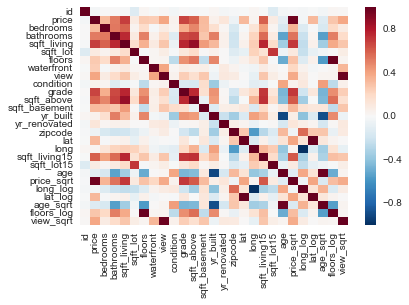

In [145]:
#See how they relate to each other
sns.heatmap(prices_df.corr())

In [146]:
# Initialize and train our tree.
start_time = datetime.now()

X = prices_df[['bedrooms', 'bathrooms', 'sqft_living', 'view_sqrt', 'floors', 'grade',
             'lat_log', 'waterfront', 'age']] 
y = prices_df.price_sqrt

regr_1 = DecisionTreeRegressor(max_depth=5)
regr_2 = DecisionTreeRegressor(max_depth=9)
regr_1.fit(X, y)
regr_2.fit(X, y)
print(cross_val_score(regr_1, X, Y, cv=10))
print(cross_val_score(regr_2, X, Y, cv=10))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

"""# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()"""

[ 0.72881487  0.73292068  0.70797642  0.73356472  0.70780419  0.73852938
  0.7215415   0.74566653  0.73487687  0.721989  ]
[ 0.79442777  0.79742545  0.78254416  0.7831327   0.78820416  0.7841652
  0.78042365  0.7962937   0.80791149  0.71948593]
Duration: 0:00:00.798924


'# Predict\nX_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]\ny_1 = regr_1.predict(X_test)\ny_2 = regr_2.predict(X_test)\n\n# Plot the results\nplt.figure()\nplt.scatter(X, y, s=20, edgecolor="black",\n            c="darkorange", label="data")\nplt.plot(X_test, y_1, color="cornflowerblue",\n         label="max_depth=2", linewidth=2)\nplt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)\nplt.xlabel("data")\nplt.ylabel("target")\nplt.title("Decision Tree Regression")\nplt.legend()\nplt.show()'

In [147]:
start_time = datetime.now()

rfc = ensemble.RandomForestRegressor()
X = prices_df[['bedrooms', 'bathrooms', 'sqft_living', 'view_sqrt', 'floors', 'grade',
             'lat_log', 'waterfront', 'age']] 
Y = prices_df.price_sqrt

print(cross_val_score(rfc, X, Y, cv=10))
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

[ 0.82568307  0.83310409  0.82448555  0.82473517  0.81833254  0.83345476
  0.82788482  0.83949018  0.83254137  0.81868463]
Duration: 0:00:06.167640


In [148]:
start_time = datetime.now()

rfc = ensemble.RandomForestRegressor()
X = prices_df[['bedrooms', 'bathrooms', 'sqft_living', 'view_sqrt', 'floors', 'grade',
             'lat_log', 'waterfront', 'age']] 
Y = prices_df.price_sqrt
pca = PCA(n_components=4)
X_std_pca = pca.fit_transform(X)
X1 = pd.DataFrame(X_std_pca)
print(cross_val_score(rfc, X1, Y, cv=10))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

[ 0.60774121  0.63238733  0.59208506  0.60436372  0.56750888  0.61640622
  0.6121221   0.63534824  0.625367    0.57941514]
Duration: 0:00:07.552723
